In [1]:
# Deep learning model for identifying images in Fashion MNIST data
#There are 10 categories of items,each assigned a value 0-9
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras import backend as K
import numpy as np
import pickle
import matplotlib.pyplot as plt
#Opening files for reading the data
fileObjectx = open('trainX.pickle','rb')
fileObjecty = open('trainY.pickle','rb')
fileObjectX = open('testX.pickle','rb')

# load the object from the files
trainX= pickle.load(fileObjectx)  
print(plt.imshow(trainX[0],cmap=plt.cm.binary))
plt.show()
trainX.shape
trainY= pickle.load(fileObjecty)
trainY.shape
testX_retrive= pickle.load(fileObjectX)

testX_retrive.shape


Using TensorFlow backend.


AxesImage(80,52.8;496x369.6)


<Figure size 640x480 with 1 Axes>

(10000, 28, 28)

In [2]:
#Splitting the data into training data and testing data

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(trainX,trainY,random_state=1)


In [3]:
print(X_test.shape)
print(y_test.shape)

(15000, 28, 28)
(15000,)


In [4]:
#Parameters for training the model

#number of training examples utilized in one iteration
batch_size = 256

#number of classes of the output
num_classes = 10

#number of times the model loop through data for training
epochs = 30

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train shape: (45000, 28, 28)
45000 train samples
15000 test samples


In [6]:
#reshaping the data for training
from keras.utils import np_utils
X_train=X_train.reshape((-1,28,28,1))
X_test=X_test.reshape((-1,28,28,1))
print(X_train.shape,y_train.shape)

(45000, 28, 28, 1) (45000, 10)


In [8]:
#Using Convolutional Neural Networks model 
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))

#Dropout for stopping overfitting
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()
#Using Adam optimizer.
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
__________

In [9]:
#set early stopping monitor so the model stops training when it won't improve anymore
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=5)
#Training the model
hist=model.fit(X_train,y_train,epochs=epochs,shuffle=True,batch_size=batch_size,verbose=1,validation_split=0.20,callbacks=[early_stopping_monitor])
#loss and accuracy returnedfrom evaluate function
loss,accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy*100,'%')

W0624 00:23:08.279364  9272 deprecation.py:323] From E:\anaconda\envs\assignment3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 36000 samples, validate on 9000 samples
Epoch 1/30
36000/36000 [==============================] - 122s 3ms/step - loss: 0.8627 - acc: 0.6910 - val_loss: 0.6470 - val_acc: 0.7696
Epoch 2/30
36000/36000 [==============================] - 96s 3ms/step - loss: 0.4852 - acc: 0.8264 - val_loss: 0.4883 - val_acc: 0.8293
Epoch 3/30
36000/36000 [==============================] - 101s 3ms/step - loss: 0.4067 - acc: 0.8554 - val_loss: 0.4100 - val_acc: 0.8587
Epoch 4/30
36000/36000 [==============================] - 103s 3ms/step - loss: 0.3663 - acc: 0.8704 - val_loss: 0.3784 - val_acc: 0.8734
Epoch 5/30
36000/36000 [==============================] - 105s 3ms/step - loss: 0.3415 - acc: 0.8788 - val_loss: 0.3611 - val_acc: 0.8772
Epoch 6/30
36000/36000 [==============================] - 103s 3ms/step - loss: 0.3192 - acc: 0.8844 - val_loss: 0.3297 - val_acc: 0.8883
Epoch 7/30
36000/36000 [==============================] - 96s 3ms/step - loss: 0.3021 - acc: 0.8918 - val_loss: 0.3359 - val

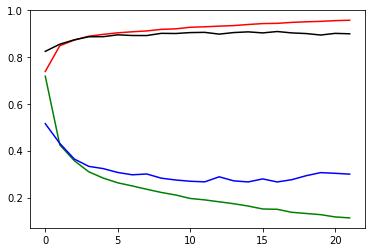

Prediction for the splitted test data: [3 1 5 ... 7 6 7]
Prediction for the testX: [9 2 1 ... 8 1 5]


In [9]:
#Plotting the loss ,acc,val_loss and val_acc
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.plot(hist.history['acc'],'r')
plt.plot(hist.history['val_acc'],'black')

plt.show()

#Predicting for the test data
pred=model.predict_classes(X_test)
print("Prediction for the splitted test data:",pred)

#Saving the model 
model.save('apparels_image_reader.model')

#loading the saved model for prediction 
new_model=keras.models.load_model('apparels_image_reader.model')

#Prediction on the new data
testX=testX_retrive.reshape((-1,28,28,1))
prediction=new_model.predict_classes(testX)
print("Prediction for the testX:",prediction)



In [10]:
# Storing the predictions in a pickle file named result.
filename = 'result.pickle'
outfile = open(filename,'wb')
pickle.dump(prediction,outfile)
outfile.close()
